# Monte Carlo Simulation
#### by
<ul>
    <li>Vedank Goyal 2K18/MC/122</li>
    <li>Sarthak Singh 2K18/MC/103</li>
</ul>

### Importing the necessary libraries

In [175]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from datetime import datetime
%matplotlib inline

### Getting the data
<ul>
    <li>The DataReader function of the pandas_datareader library uses Yahoo finance to get the stock prices.</li>
    <li>The stock price is read for Amazon company</li>
</ul>

In [176]:
ticker = 'AMZN'
df = pd.DataFrame()
df = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
...,...,...,...,...,...,...
2020-11-11,3139.149902,3050.000000,3061.780029,3137.389893,4366900,3137.389893
2020-11-12,3175.879883,3086.050049,3159.949951,3110.280029,4362000,3110.280029
2020-11-13,3141.719971,3085.389893,3122.000000,3128.810059,3756200,3128.810059


### Data cleaning
<ul>
    <li>We will use and work on the 'Adj Close' value of the stocks as they are more refined</li>
    <li>We will collect the data till December 31st 2019 and predict for the year 2020</li>
</ul>

In [177]:
data = df['Adj Close'].loc[:'2019-12-31']
data

Date
2009-12-31     134.520004
2010-01-04     133.899994
2010-01-05     134.690002
2010-01-06     132.250000
2010-01-07     130.000000
                 ...     
2019-12-24    1789.209961
2019-12-26    1868.770020
2019-12-27    1869.800049
2019-12-30    1846.890015
2019-12-31    1847.839966
Name: Adj Close, Length: 2517, dtype: float64

### Computing log_returns or log of percentage change in values from day to day

In [178]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

Date
2009-12-31         NaN
2010-01-04   -0.004620
2010-01-05    0.005883
2010-01-06   -0.018282
2010-01-07   -0.017160
Name: Adj Close, dtype: float64

### Time vs Stock Price

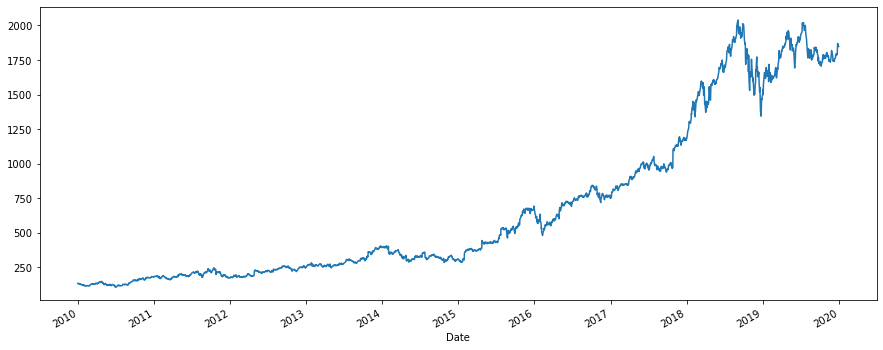

In [179]:
data.plot(figsize=(15,6))

### Computing parameters
<ul>
    <li>u is the mean of returns</li>
    <li>var is the variance of returns</li>
    <li>sigma is the std deviation</li>
</ul>

In [180]:
u = log_returns.mean()
var = log_returns.var()
sigma = log_returns.std()

### Computing drift
>Drift represents the average growth rate

In [181]:
drift = u - (0.5*var)
drift

0.0008523320447740236

### Computing the daily returns
<ul>
    <li>Taking 10000 simulations</li>
    <li>n_steps is the number of days from January 1st 2020</li>
    <li>Z is the normal matrix</li>
    <li>Daily returns is the exponential random matrix</li> 
</ul>

In [182]:
n_simulations = 10000
n_steps = df.shape[0] - data.shape[0]
Z = norm.ppf(np.random.rand(n_steps, n_simulations)) #days, trials
daily_returns = np.exp(drift + sigma * Z)

### Computing the results (price_paths)

In [183]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range(1, n_steps):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

### Plotting the simulations
<ul>
    <li>X axis represents number of days from January 1st 2020</li>
    <li>Y axis represents the predicted stock values</li>
</ul>

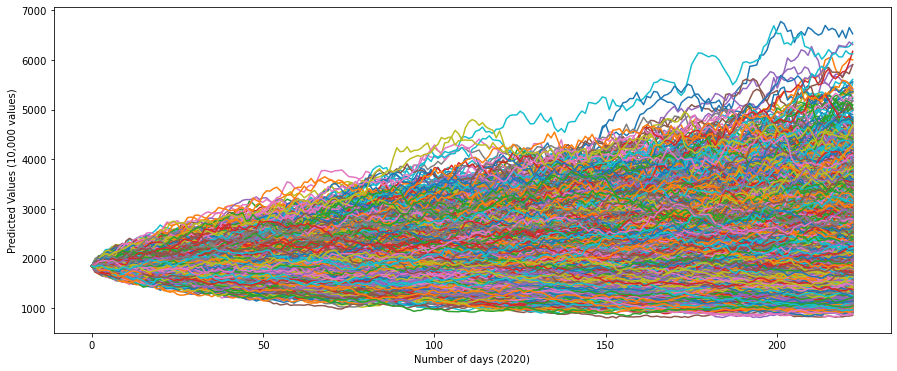

In [184]:
fig = plt.figure(figsize=(15,6))
plt.plot(price_paths)
plt.xlabel('Number of days (2020)')
plt.ylabel('Predicted Values (10,000 values)')
plt.show()

### Comparing with actual values
<ul>
    <li>Took mean of all 10,000 values</li>
    <li>Plotted the predicted mean values with actual values</li>
</ul>

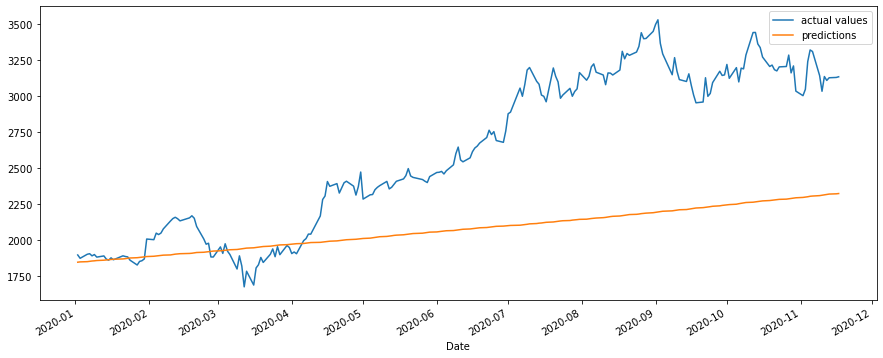

In [185]:
results = np.mean(price_paths,axis = 1)
stocks = pd.DataFrame()
stocks['actual values'] = df['Adj Close'].loc['2020-01-02':]
stocks['predictions'] = results
stocks.plot(figsize=(15,6))